## Import Library

In [1]:
from sklearn.preprocessing import MinMaxScaler
from bs4 import BeautifulSoup
import requests
import sqlite3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Extract

#### 1.1 project_data.csv

In [2]:
projects_data_csv_df = pd.read_csv("data-source/projects_data.csv")
projects_data_csv_df

C:\Users\MATRIX COMPUTER\AppData\Local\Temp\ipykernel_15028\2141697812.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_data_csv_df = pd.read_csv("data-source/projects_data.csv")


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.2 population_data.csv

In [3]:
# menggunakan skiprows karena terdapat data yang tidak sesuai format (error) di dalam csv
population_data_csv_df = pd.read_csv("data-source/population_data.csv", skiprows=[0, 2])
population_data_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


#### 1.3 population_data.json

In [4]:
population_data_json_df = pd.read_json("data-source/population_data.json")
population_data_json_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


#### 1.4 population_data.xml

In [5]:
with open("data-source/population_data.xml","r") as file:
    xml_data = file.read()

# parsing xml menggunakan lmxl
soup = BeautifulSoup(xml_data, "lxml")

# mengekstrak data dari tag record
data_records = []
for record in soup.find_all("record"):
    record_data = {}
    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        record_data[name] = value
    data_records.append(record_data)

population_data_xml_df = pd.DataFrame(data_records)
population_data_xml_df


,Country or Area,Item,Year,Value
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032
...,...,...,...,...
15307,Zimbabwe,"Population, total",2013,15054506
15308,Zimbabwe,"Population, total",2014,15411675
15309,Zimbabwe,"Population, total",2015,15777451
15310,Zimbabwe,"Population, total",2016,16150362


#### 1.5 population_data.db

##### 1.5.1 "SELECT * FROM population_data"

In [6]:
conn = sqlite3.connect('data-source/population_data.db')
cursor = conn.cursor()

query1 = "SELECT * FROM population_data"
population_data_db_df1 = pd.read_sql_query(query1, conn)
population_data_db_df1

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


##### 1.5.2 "SELECT Country_Name, Country_Code, 1960 FROM population_data"

In [7]:
query2 = "SELECT Country_Name, Country_Code, 1960 FROM population_data"
population_data_db_df2 = pd.read_sql_query(query2, conn)
population_data_db_df2

,Country_Name,Country_Code,1960
0,Aruba,ABW,1960
1,Afghanistan,AFG,1960
2,Angola,AGO,1960
3,Albania,ALB,1960
4,Andorra,AND,1960
...,...,...,...
259,Kosovo,XKX,1960
260,"Yemen, Rep.",YEM,1960
261,South Africa,ZAF,1960
262,Zambia,ZMB,1960


#### 1.6 data API World Bank

In [8]:
# membuat dataframe berisi kode-kode negara yang akan digunakan
country_code = [
        "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "ARG", "ARM", "ASM", "ATG", "AUS", "AUT", "AZE", "BDI", "BEL", "BEN", "BFA", "BGD", "BGR",
        "BHR", "BHS", "BIH", "BLR", "BLZ", "BMU", "BOL", "BRA", "BRB", "BRN", "BTN", "BWA", "CAF", "CAN", "CEB", "CHE", "CHI", "CHL", "CHN", "CIV",
        "CMR", "COD", "COG", "COL", "COM", "CPV", "CRI", "CSS", "CUB", "CUW", "CYM", "CYP", "CZE", "DEU", "DJI", "DMA", "DNK", "DOM", "DZA", "EAP",
        "EAR", "EAS", "ECA", "ECS", "ECU", "EGY", "EMU", "ERI", "ESP", "EST", "ETH", "EUU", "FCS", "FIN", "FJI", "FRA", "FRO", "FSM", "GAB", "GBR",
        "GEO", "GHA", "GIB", "GIN", "GMB", "GNB", "GNQ", "GRC", "GRD", "GRL", "GTM", "GUM", "GUY", "HIC", "HKG", "HND", "HPC", "HRV", "HTI", "HUN",
        "IBD", "IBT", "IDA", "IDB", "IDN", "IDX", "IMN", "IND", "INX", "IRL", "IRN", "IRQ", "ISL", "ISR", "ITA", "JAM", "JOR", "JPN", "KAZ", "KEN",
        "KGZ", "KHM", "KIR", "KNA", "KOR", "KWT", "LAC", "LAO", "LBN", "LBR", "LBY", "LCA", "LCN", "LDC", "LIC", "LIE", "LKA", "LMC", "LMY", "LSO",
        "LTE", "LTU", "LUX", "LVA", "MAC", "MAF", "MAR", "MCO", "MDA", "MDG", "MDV", "MEA", "MEX", "MHL", "MIC", "MKD", "MLI", "MLT", "MMR", "MNA",
        "MNE", "MNG", "MNP", "MOZ", "MRT", "MUS", "MWI", "MYS", "NAC", "NAM", "NCL", "NER", "NGA", "NIC", "NLD", "NOR", "NPL", "NRU", "NZL", "OED",
        "OMN", "OSS", "PAK", "PAN", "PER", "PHL", "PLW", "PNG", "POL", "PRE", "PRI", "PRK", "PRT", "PRY", "PSE", "PSS", "PST", "PYF", "QAT", "ROU",
        "RUS", "RWA", "SAS", "SAU", "SDN", "SEN", "SGP", "SLB", "SLE", "SLV", "SMR", "SOM", "SRB", "SSA", "SSD", "SSF", "SST", "STP", "SUR", "SVK",
        "SVN", "SWE", "SWZ", "SXM", "SYC", "SYR", "TCA", "TCD", "TEA", "TEC", "TGO", "THA", "TJK", "TKM", "TLA", "TLS", "TMN", "TON", "TSA", "TSS",
        "TTO", "TUN", "TUR", "TUV", "TZA", "UGA", "UKR", "UMC", "URY", "USA", "UZB", "VCT", "VEN", "VGB", "VIR", "VNM", "VUT", "WLD", "WSM", "XKX",
        "YEM", "ZAF", "ZMB", "ZWE"
   ]

base_url = "https://api.worldbank.org/v2/countries/{}/indicators/SP.POP.TOTL/?format=json&per_page=1000"

# membuat list country code
country_codes = country_code
# membuat dataframe yang akan menyimpan data dari url api
api_world_bank_df = pd.DataFrame()

# mengakses data dari API untuk setiap country code
for code in country_codes:
   url = base_url.format(code)
   response = requests.get(url)
   data = response.json()[1]  # Mengambil bagian data dari response JSON
   country_data_df = pd.DataFrame(data)
   api_world_bank_df = pd.concat([api_world_bank_df, country_data_df], ignore_index=True)

# memilih kolom yang diperlukan
api_world_bank_df = api_world_bank_df.rename(columns={"country": "Country Name", 
                                                      "countryiso3code": "Country Code", 
                                                      "indicator": "Indicator Name", 
                                                      "date": "Year", 
                                                      "value": "api_value"})
api_world_bank_df["Country Name"] = api_world_bank_df["Country Name"].apply(lambda x: x["value"])
api_world_bank_df["Indicator Code"] = api_world_bank_df["Indicator Name"].apply(lambda x: x["id"])
api_world_bank_df["Indicator Name"] = api_world_bank_df["Indicator Name"].apply(lambda x: x["value"])

# mengubah urutan kolom 
api_world_bank_df = api_world_bank_df.reindex(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code", "Year", "api_value"])
api_world_bank_df

C:\Users\MATRIX COMPUTER\AppData\Local\Temp\ipykernel_15028\2872496536.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  api_world_bank_df = pd.concat([api_world_bank_df, country_data_df], ignore_index=True)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,api_value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,2023,NaN
1,Aruba,ABW,"Population, total",SP.POP.TOTL,2022,106445.0
2,Aruba,ABW,"Population, total",SP.POP.TOTL,2021,106537.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,2020,106585.0
4,Aruba,ABW,"Population, total",SP.POP.TOTL,2019,106442.0
...,...,...,...,...,...,...
16891,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1964,4310332.0
16892,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1963,4177931.0
16893,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1962,4049778.0
16894,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1961,3925952.0


#### 1.7 rural_population_percent.csv

In [9]:
rural_population_csv_df = pd.read_csv("data-source/rural_population_percent.csv", skiprows=[0, 2])
rural_population_csv_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224000,49.23900,49.25400,49.27000,49.285000,49.30000,...,56.579000,56.94100,57.302000,57.636000,57.942000,58.22100,58.47200,58.696000,58.893000,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779000,91.49200,91.19500,90.89000,90.574000,90.25000,...,75.687000,75.31100,74.926000,74.532000,74.129000,73.71800,73.29700,72.868000,72.430000,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565000,89.20200,88.79600,88.37600,87.942000,87.49600,...,60.701000,59.90300,59.100000,58.301000,57.510000,56.72600,55.95000,55.181000,54.422000,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295000,69.05700,68.98500,68.91400,68.842000,68.77000,...,48.924000,47.83700,46.753000,45.670000,44.617000,43.59100,42.59300,41.624000,40.684000,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550000,39.01700,36.53800,34.12800,31.795000,29.55500,...,11.648000,12.18300,12.740000,13.292000,13.835000,14.36700,14.88500,15.388000,15.873000,NaN
5,Arab World,ARB,Rural population (% of total population),SP.RUR.TOTL.ZS,68.708026,67.96558,67.21982,66.45096,65.652964,64.81343,...,44.156769,43.80453,43.463488,43.128649,42.803731,42.49126,42.19179,41.906071,41.631967,NaN
6,United Arab Emirates,ARE,Rural population (% of total population),SP.RUR.TOTL.ZS,26.500000,25.61700,24.75200,23.90700,23.081000,22.27700,...,16.277000,15.94500,15.625000,15.316000,15.019000,14.73400,14.45900,14.196000,13.942000,NaN
7,Argentina,ARG,Rural population (% of total population),SP.RUR.TOTL.ZS,26.389000,25.78300,25.23300,24.69100,24.156000,23.63100,...,9.205000,9.03400,8.867000,8.705000,8.548000,8.39600,8.24900,8.107000,7.970000,NaN
8,Armenia,ARM,Rural population (% of total population),SP.RUR.TOTL.ZS,48.725000,47.85300,46.98100,46.11100,45.242000,44.37800,...,36.211000,36.42000,36.629000,36.839000,37.025000,37.18800,37.32700,37.442000,37.533000,NaN
9,American Samoa,ASM,Rural population (% of total population),SP.RUR.TOTL.ZS,33.789000,33.35900,32.93200,32.50700,32.084000,31.66600,...,12.303000,12.40600,12.500000,12.587000,12.666000,12.73600,12.79800,12.852000,12.897000,NaN


#### 1.8 electricity_access_percent.csv

In [10]:
electricity_access_csv_df = pd.read_csv("data-source/electricity_access_percent.csv", skiprows=[0, 2])
electricity_access_csv_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
5,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
6,United Arab Emirates,ARE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
7,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.363365,98.820000,99.216164,99.584412,99.837128,99.959244,99.995209,100.000000,NaN,NaN
8,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.519814,99.800000,99.767151,99.878876,99.954056,99.988976,100.000000,100.000000,NaN,NaN
9,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.9 gdp_data.csv

In [11]:
gdp_csv_df = pd.read_csv("data-source/gdp_data.csv", skiprows=[0, 2])
gdp_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


## 2. Transform

##### Function cleaning di bawah ini digunakan untuk menghapus data duplikat dan menghapus missing value yang berlebihan

In [12]:
def cleaning(df):
   # mengganti nilai '!$!0' (khususnya pada dataset projects_data.csv di kolom sector1 dan theme1) pada df dengan NaN agar dianggap sebagai missing values
   df.replace('!$!0', np.nan, inplace=True)
   
   # menghapus data duplikat
   df.drop_duplicates()

   # mengecek missing values pada kolom dataframe
   missing_values = df.isnull().sum()

   # menghitung nilai seperempat dari jumlah data
   num_of_rows = int(len(df)/4)

   for column, missing_count in missing_values.items():
      if missing_count >= num_of_rows:
         # menghapus kolom jika memiliki missing values lebih dari atau sama dengan seperempat dari jumlah data (missing values >= 25%)
         df.drop(column, axis=1, inplace=True)
      
   # menghapus baris yang memiliki nilai NaN lebih dari 1, tetapi mempertahankan baris yang memiliki minimal dua nilai non-NaN
   df.dropna(thresh=len(df.columns) - 1)

   # mereset index pada dataframe untuk memudahkan pengaksesan dengan index
   df = df.reset_index(drop=True)
   return df

##### Function data_type di bawah ini digunakan untuk mengubah tipe data dalam dataframe projects_data.csv dan population_data (csv, json, xml, dan db)

In [13]:
def data_type(df, columns, types):
   if types == "string":
      for column_name in columns:
         df[column_name] = df[column_name].astype('string')  
   elif types == "numeric":
      for column_name in columns:
         # errors='coerce' untuk mengubah nilai non numerik menjadi NaN
         df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
   elif types == "date_time":
      for column_name in columns:
         df[column_name] = pd.to_datetime(df[column_name])

##### Function remove_duplicate_column di bawah ini digunakan untuk mengecek kesamaan antara dua buah kolom dan menghapus salah satunya jika value yang dimiliki sama persis

In [14]:
# fungsi untuk menghapus salah satu dari dua buah kolom yang memiliki value yang sama persis
def remove_duplicate_column(df, col1, col2):
   different_status = df[df[col1] != df[col2]]
   if different_status.empty:
      df.drop([col1], axis=1, inplace=True)

##### Function fillna_custom di bawah ini digunakan untuk mengisi nilai yang hilang berdasarkan modus dari nilai kolom acuan yang sejenis

In [15]:
# fungsi untuk mengisi nilai yang hilang berdasarkan aturan bisnis (mengacu pada nilai yang sama/sejenis)
def fillna_custom(group):
    if group.mode().empty:
        return group  # jika tidak ada modus, maka akan me-return grup tanpa perubahan
    else:
        mode_value = group.mode().iloc[0]  # mengambil nilai modus dari grup
        return group.fillna(mode_value)  # mengisi nilai yang hilang dengan nilai modus

#### 2.1 Melakukan encoding dataset mystery.csv dengan utf-16

In [16]:
# melakukan encoding terhadap dataset mystery.csv
mystery_csv_df = pd.read_csv("data-source/mystery.csv", encoding='utf-16')

# melakukan penyesuaian tipe data dan membersihkan dataset
data_type(mystery_csv_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")
mystery_csv_df.drop("Unnamed: 0", axis=1, inplace=True)
mystery_csv_df = cleaning(mystery_csv_df)
missing_values = mystery_csv_df.isnull().sum()
print(missing_values)

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64


#### 2.2 Melakukan penyesuaian tipe data untuk dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db

##### 2.2.1 projects_data.csv (sekaligus dengan cleaning data)

In [17]:
# melakukan cleaning terlebih dahulu untuk menghapus kolom yang terlalu banyak memiliki missing value agar mengurangi penyesuaian tipe data yang kompleks
cleaned_prodatcsv_df = cleaning(projects_data_csv_df)

# melakukan penyesuaian tipe data
data_type(cleaned_prodatcsv_df, ["id", "regionname", "countryname", "prodline", "lendinginstr", "lendinginstrtype", "supplementprojectflg",
                                 "productlinetype", "projectstatusdisplay", "status", "project_name", "board_approval_month", "url", "sector1",
                                 "sector", "mjsector"], "string")
data_type(cleaned_prodatcsv_df, ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"], "numeric")
data_type(cleaned_prodatcsv_df, ["boardapprovaldate", "closingdate"], "date_time")

# melakukan cleaning kembali setelah melakukan penyesuaian tipe data karena setelah dilakukan cleaning terdapat data non numerik yang telah berubah 
# menjadi NaN sehingga dihitung sebagai missing values
cleaned_prodatcsv_df = cleaning(cleaned_prodatcsv_df)
print(cleaned_prodatcsv_df.dtypes)

missing_values = cleaned_prodatcsv_df.isnull().sum()
print(missing_values)
print(len(cleaned_prodatcsv_df))

id                           string[python]
regionname                   string[python]
countryname                  string[python]
prodline                     string[python]
lendinginstr                 string[python]
lendinginstrtype             string[python]
supplementprojectflg         string[python]
productlinetype              string[python]
projectstatusdisplay         string[python]
status                       string[python]
project_name                 string[python]
boardapprovaldate       datetime64[ns, UTC]
board_approval_month         string[python]
closingdate             datetime64[ns, UTC]
grantamt                            float64
url                          string[python]
sector1                      string[python]
sector                       string[python]
mjsector                     string[python]
dtype: object
id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             246
lendi

In [18]:
# handling missing values pada projects_data.csv

# mengambil data dari kolom lendinginstr yang paling banyak muncul
modus_val = cleaned_prodatcsv_df["lendinginstr"].value_counts().nlargest(1)
# mengisi missing values pada kolom lendinginstr menjadi lendinginstr yang paling banyak muncul
cleaned_prodatcsv_df["lendinginstr"].fillna(str(modus_val.index[0]), inplace=True)

# mengganti nilai yang hilang pada kolom lendinginstrtype berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["lendinginstrtype"] = cleaned_prodatcsv_df.groupby("lendinginstr")["lendinginstrtype"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom supplementprojectflg berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["supplementprojectflg"] = cleaned_prodatcsv_df.groupby("lendinginstr")["supplementprojectflg"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom projectstatusdisplay berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["projectstatusdisplay"] = cleaned_prodatcsv_df.groupby("lendinginstr")["projectstatusdisplay"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom boardapprovaldate berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["boardapprovaldate"] = cleaned_prodatcsv_df.groupby("lendinginstr")["boardapprovaldate"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom board_approval_month berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["board_approval_month"] = cleaned_prodatcsv_df.groupby("lendinginstr")["board_approval_month"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom sector1 berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["sector1"] = cleaned_prodatcsv_df.groupby("lendinginstr")["sector1"].transform(fillna_custom)

# mengganti nilai yang hilang pada kolom status berdasarkan kolom projectstatusdisplay
cleaned_prodatcsv_df["status"] = cleaned_prodatcsv_df.groupby("projectstatusdisplay")["status"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom sector berdasarkan kolom sector1
cleaned_prodatcsv_df["sector"] = cleaned_prodatcsv_df.groupby("sector1")["sector"].transform(fillna_custom)
# mengganti nilai yang hilang pada kolom mjsector berdasarkan kolom sector1
cleaned_prodatcsv_df["mjsector"] = cleaned_prodatcsv_df.groupby("sector1")["mjsector"].transform(fillna_custom)

# mengganti nilai yang hilang pada kolom closingdate berdasarkan kolom boardapprovaldate
cleaned_prodatcsv_df["closingdate"] = cleaned_prodatcsv_df.groupby("boardapprovaldate")["closingdate"].transform(fillna_custom)
# mengambil data dari kolom closingdate yang paling banyak muncul
modus_val = cleaned_prodatcsv_df["closingdate"].value_counts().nlargest(1)
# mengisi missing values pada kolom closingdate menjadi closingdate yang paling banyak muncul
cleaned_prodatcsv_df["closingdate"].fillna(str(modus_val.index[0]), inplace=True)

# menghapus kolom grantamt jika totalnya kurang dari atau sama dengan 0 (tidak memiliki value)
if cleaned_prodatcsv_df["grantamt"].sum() <= 0:
   cleaned_prodatcsv_df.drop(["grantamt"], axis=1, inplace=True)

missing_values = cleaned_prodatcsv_df.isnull().sum()
print("Missing Values:")
print(missing_values)
print(len(cleaned_prodatcsv_df))

Missing Values:
id                      0
regionname              0
countryname             0
prodline                0
lendinginstr            0
lendinginstrtype        0
supplementprojectflg    0
productlinetype         0
projectstatusdisplay    0
status                  0
project_name            0
boardapprovaldate       0
board_approval_month    0
closingdate             0
url                     0
sector1                 0
sector                  0
mjsector                0
dtype: int64
18248


In [19]:
# memperbaiki value dari kolom
cleaned_prodatcsv_df['countryname'] = cleaned_prodatcsv_df['countryname'].apply(lambda x: x.split(';')[0]).astype('string')
cleaned_prodatcsv_df['sector1'] = cleaned_prodatcsv_df['sector1'].apply(lambda x: x.split('!')[0])
cleaned_prodatcsv_df['sector1'] = cleaned_prodatcsv_df['sector1'].apply(lambda x: x.split(';')[0]).astype('string')
cleaned_prodatcsv_df['sector'] = cleaned_prodatcsv_df['sector'].apply(lambda x: x.split(';')[0]).astype('string')
cleaned_prodatcsv_df['mjsector'] = cleaned_prodatcsv_df['mjsector'].apply(lambda x: x.split(';')[0]).astype('string')

# menghapus kolom-kolom yang memungkinkan untuk memiliki value yang sama      
remove_duplicate_column(cleaned_prodatcsv_df, "projectstatusdisplay", "status")
remove_duplicate_column(cleaned_prodatcsv_df, "sector1", "sector")

cleaned_prodatcsv_df.to_csv("test.csv")
cleaned_prodatcsv_df.dtypes

id                           string[python]
regionname                   string[python]
countryname                  string[python]
prodline                     string[python]
lendinginstr                 string[python]
lendinginstrtype             string[python]
supplementprojectflg         string[python]
productlinetype              string[python]
status                       string[python]
project_name                 string[python]
boardapprovaldate       datetime64[ns, UTC]
board_approval_month         string[python]
closingdate             datetime64[ns, UTC]
url                          string[python]
sector                       string[python]
mjsector                     string[python]
dtype: object

##### 2.2.2 mystery.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db, dan data API World Bank

In [20]:
# mystery_csv_df.csv
data_type(mystery_csv_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

# population_data.csv
data_type(population_data_csv_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

# population_data.json
data_type(population_data_json_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

# population_data.xml
data_type(population_data_xml_df, ["Country or Area", "Item"], "string")
data_type(population_data_xml_df, ["Year", "Value"], "numeric")

# population_data.db
data_type(population_data_db_df1, ["Country_Name", "Country_Code", "Indicator_Name", "Indicator_Code"], "string")

# API World Bank
data_type(api_world_bank_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")
data_type(api_world_bank_df, ["Year"], "numeric")

#### 2.3 Mengkombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara

In [21]:
cleaned_rural_df = cleaning(rural_population_csv_df)
cleaned_electricity_df = cleaning(electricity_access_csv_df)
rural_electricity_df = pd.merge(rural_population_csv_df, electricity_access_csv_df, on=["Country Name", "Country Code"], suffixes=("_rural", "_electricity"))
rural_electricity_df.tail(11)

,Country Name,Country Code,Indicator Name_rural,Indicator Code_rural,1960,1961,1962,1963,1964,1965,...,2007_electricity,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity
253,British Virgin Islands,VGB,Rural population (% of total population),SP.RUR.TOTL.ZS,87.772000,87.38200,86.9810,86.570000,86.14600,85.71300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Virgin Islands (U.S.),VIR,Rural population (% of total population),SP.RUR.TOTL.ZS,43.523000,42.13600,40.7590,39.396000,38.04800,36.72100,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
255,Vietnam,VNM,Rural population (% of total population),SP.RUR.TOTL.ZS,85.300000,84.96900,84.6310,84.286000,83.93600,83.57900,...,94.046867,95.208260,96.100000,97.591133,99.000000,100.000000,100.000000,99.200000,100.000000,100.000000
256,Vanuatu,VUT,Rural population (% of total population),SP.RUR.TOTL.ZS,89.596000,89.41700,89.2350,89.050000,88.86200,88.67100,...,33.624620,33.873974,33.291115,36.898365,38.434589,39.982830,31.700000,43.103348,44.669613,57.820000
257,World,WLD,Rural population (% of total population),SP.RUR.TOTL.ZS,66.427899,65.91479,65.4728,65.085718,64.69204,64.47039,...,81.747638,82.278317,83.211382,83.539093,82.504609,85.041356,85.163456,85.690892,87.028468,87.351269
258,Samoa,WSM,Rural population (% of total population),SP.RUR.TOTL.ZS,81.074000,81.01400,80.9390,80.859000,80.77900,80.69900,...,93.768532,94.694328,97.900000,96.606010,96.668575,98.504707,99.255646,97.900000,99.938278,100.000000
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,97.244034,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900000,90.54100,90.1690,89.784000,89.38600,88.97400,...,59.042709,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381000,53.20700,53.0940,52.980000,52.86600,52.75200,...,82.000000,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855000,81.04900,80.2150,79.288000,77.98500,76.62800,...,18.500000,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337


#### 2.4 Cleaning data dan handling missing values pada population_data.csv, population_data.json, population_data.xml, population_data.db, dan data API World Bank

##### 2.4.1 mystery.csv

In [22]:
cleaned_mystery_df = cleaning(mystery_csv_df)
numeric_df = cleaned_mystery_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_mystery_df = cleaned_mystery_df.fillna(mean_values)
cleaned_popdatcsv_df = cleaned_mystery_df.sort_values(by="Country Name").reset_index()
cleaned_popdatcsv_df.drop("index", axis=1, inplace=True)

cleaned_popdatcsv_df.to_csv("data-cleaned/cleaned_mystery.csv")
cleaned_popdatcsv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
260,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.2 population_data.csv

In [23]:
cleaned_popcsv_df = cleaning(population_data_csv_df)
numeric_df = cleaned_popcsv_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popcsv_df = cleaned_popcsv_df.fillna(mean_values)
cleaned_popdatcsv_df = cleaned_popcsv_df.sort_values(by="Country Name").reset_index()
cleaned_popdatcsv_df.drop("index", axis=1, inplace=True)

cleaned_popdatcsv_df.to_csv("data-cleaned/cleaned_popcsv.csv")
cleaned_popdatcsv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
260,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.3 population_data.json

In [24]:
cleaned_popjson_df = cleaning(population_data_json_df)
numeric_df = cleaned_popjson_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popjson_df = cleaned_popjson_df.fillna(mean_values)
cleaned_popdatjson_df = cleaned_popjson_df.sort_values(by="Country Name").reset_index()
cleaned_popdatjson_df.drop("index", axis=1, inplace=True)

cleaned_popdatjson_df.to_csv("data-cleaned/cleaned_popcsv.csv")
cleaned_popdatjson_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
260,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.4 population_data.xml

In [25]:
population_data_xml_df = population_data_xml_df.pivot(index=['Country or Area', 'Item'], columns='Year', values='Value').reset_index()   # mengubah format dataframe
population_data_xml_df.columns.name = None   # menghapus nama kolom indeks
population_data_xml_df = population_data_xml_df.rename(columns={"Country or Area": "Country Name", "Item": "Indicator Name"})
cleaned_popxml_df = cleaning(population_data_xml_df)
numeric_df = cleaned_popxml_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popxml_df = cleaned_popxml_df.fillna(mean_values)
cleaned_popxml_df["Country Code"] = cleaned_popcsv_df["Country Code"]
cleaned_popxml_df["Indicator Code"] = cleaned_popcsv_df["Indicator Code"]

# mengubah urutan kolom 
# cleaned_popxml_df = cleaned_popxml_df.reindex(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code",
#                                                        "1960", "1961", "1962", "1963", "1964", "1965", "1966", "1967", "1968", "1969",
#                                                        "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", 
#                                                        "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989",
#                                                        "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", 
#                                                        "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", 
#                                                        "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"
#                                                        ])
cleaned_popdatxml_df = cleaned_popxml_df.reindex(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code",
                                                       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                                                       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 
                                                       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                                                       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 
                                                       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
                                                       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
                                                       ])

cleaned_popdatxml_df.to_csv("data-cleaned/datxml.csv")
cleaned_popdatxml_df
# cleaned_popxml_df.to_csv("data-cleaned/datxml.csv")
# cleaned_popxml_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,ABW,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,AFG,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,AGO,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ALB,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,XKX,"Population, total",SP.POP.TOTL,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
260,World,YEM,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
261,"Yemen, Rep.",ZAF,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.5 population_data.db

In [26]:
population_data_db_df1 = population_data_db_df1.rename(columns={"Country_Name": "Country Name",
                                                                "Country_Code": "Country Code",
                                                                "Indicator_Name": "Indicator Name",
                                                                "Indicator_Code": "Indicator Code"
                                                               })

cleaned_popdb_df = cleaning(population_data_db_df1)
cleaned_popdb_df.drop("index", axis=1, inplace=True)
numeric_df = cleaned_popdb_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popdb_df = cleaned_popdb_df.fillna(mean_values)
cleaned_popdatdb_df = cleaned_popdb_df.sort_values(by="Country Name").reset_index()
cleaned_popdatdb_df.drop("index", axis=1, inplace=True)

cleaned_popdatdb_df.to_csv("data-cleaned/cleaned_popcsv.csv")
cleaned_popdatdb_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
260,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.6 API World Bank

In [27]:
api_world_bank_df = api_world_bank_df.pivot(index=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], columns='Year', values='api_value').reset_index()
api_world_bank_df.columns.name = None   # menghapus nama kolom indeks
cleaned_apiwb_df = cleaning(api_world_bank_df)

cleaned_apiwb_df.to_csv("data-cleaned/cleaned_popapi.csv")
cleaned_apiwb_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.622466e+06,8.790140e+06,8.969047e+06,9.157465e+06,9.355514e+06,9.565147e+06,...,3.154121e+07,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07,4.112877e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06,2.837849e+06,2.811666e+06,2.777689e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.139431e+07,1.159861e+07,1.177826e+07,1.196945e+07,1.217910e+07,1.238126e+07,...,3.800063e+07,3.876017e+07,3.954315e+07,4.033933e+07,4.113655e+07,4.192701e+07,4.270537e+07,4.345167e+07,4.417797e+07,4.490322e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.008500e+04,2.062600e+04,2.127200e+04,2.194900e+04,2.265600e+04,2.339100e+04,...,5.299500e+04,5.221700e+04,5.136800e+04,5.044800e+04,4.946300e+04,4.842400e+04,4.732100e+04,4.618900e+04,4.503500e+04,4.427300e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,9.443000e+03,1.021600e+04,1.101400e+04,1.183900e+04,1.269000e+04,1.356300e+04,...,7.136700e+04,7.162100e+04,7.174600e+04,7.254000e+04,7.383700e+04,7.501300e+04,7.634300e+04,7.770000e+04,7.903400e+04,7.982400e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,4.076708e+06,4.173398e+06,4.270092e+06,4.367088e+06,4.454805e+06,4.569087e+06,4.685306e+06,4.803269e+06,4.922749e+06,5.043612e+06
260,World,WLD,"Population, total",SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.542459e+06,5.646668e+06,5.753386e+06,5.860197e+06,5.973803e+06,6.097298e+06,...,2.698400e+07,2.775330e+07,2.851654e+07,2.927400e+07,3.003439e+07,3.079051e+07,3.154669e+07,3.228405e+07,3.298164e+07,3.369661e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.119430e+06,3.219451e+06,3.323427e+06,3.431381e+06,3.542764e+06,3.658024e+06,...,1.523498e+07,1.573779e+07,1.624823e+07,1.676776e+07,1.729805e+07,1.783589e+07,1.838048e+07,1.892772e+07,1.947312e+07,2.001768e+07


#### 2.5 Melakukan penggabungan data populasi (mystery, csv, json, xml, dan db) agar memudahkan proses Scaling Features

##### 2.5.1 Menggabungkan dataset

In [28]:
cleaned_mystery_df.reset_index(drop=True, inplace=True)
cleaned_popdatcsv_df.reset_index(drop=True, inplace=True)
cleaned_popdatjson_df.reset_index(drop=True, inplace=True)
cleaned_popdatdb_df.reset_index(drop=True, inplace=True)
cleaned_popxml_df.reset_index(drop=True, inplace=True)

population_data = pd.concat([cleaned_mystery_df, cleaned_popdatcsv_df, cleaned_popdatjson_df, cleaned_popdatdb_df], axis=0, ignore_index=True)
pops_data = population_data.sort_values(by="Country Name").reset_index()
pops_data.drop("index", axis=1, inplace=True)

population_data2 = pd.concat([pops_data, cleaned_popxml_df], axis=0, ignore_index=True)
population_data2.drop_duplicates(inplace=True)
population_data2.reset_index(drop=True, inplace=True)
population_data2.to_csv("data-cleaned/popdatconcat.csv")
population_data2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,West Bank and Gaza,XKX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
524,World,YEM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
525,"Yemen, Rep.",ZAF,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
526,Zambia,ZMB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.5.2 Mengecek dan mengisi missing values kemudian melakukan cleaning data

In [29]:
population_data = cleaning(population_data)
numeric_only = population_data.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_only.mean()
population_data = cleaning(population_data.fillna(mean_values))
population_data.to_csv("data-cleaned/popdatwith_selectdtypes.csv")
population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,1.052640e+05
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
2,Angola,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,...,2.175942e+07,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,2.978419e+07
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,1.178047e+08,1.193879e+08,1.215043e+08,1.241388e+08,1.267943e+08,1.295161e+08,...,3.596688e+06,3.702218e+06,3.811102e+06,3.927051e+06,4.046901e+06,4.169506e+06,4.294682e+06,4.422143e+06,4.551566e+06,4.684777e+06
1052,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
1053,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
1054,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


#### 2.6 Mengisi missing value pada dataset gdp_data.csv (sekaligus dengan cleaning data)

In [30]:
# menghapus duplikasi data
gdp_csv_df.drop_duplicates()

# melakukan penyesuaian tipe data
data_type(gdp_csv_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

# mengambil kolom dengan tipe data numerik dan diisikan ke dalam dataframe yang baru
numeric_df = gdp_csv_df.select_dtypes(include=['float64', 'int64'])

# menghitung rata-rata nilai numerik dalam dataframe yang baru
mean_values = numeric_df.mean()

# mengisi nilai kosong dengan nilai rata-rata dari kolom numerik pada dataframe yang baru
gdp_csv_df = cleaning(gdp_csv_df.fillna(mean_values))
gdp_csv_df.dtypes

Country Name      string[python]
Country Code      string[python]
Indicator Name    string[python]
Indicator Code    string[python]
1960                     float64
                       ...      
2013                     float64
2014                     float64
2015                     float64
2016                     float64
2017                     float64
Length: 62, dtype: object

In [31]:
gdp_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,2.489833e+12,2.568666e+12,2.654314e+12,2.505671e+12,2.586241e+12,2.847928e+12
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,7.081251e+10,7.353407e+10,7.800948e+10,8.453615e+10,9.298434e+10,9.738298e+10,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,2.847928e+12
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


#### 2.7 Membuat dummy variable untuk projects_data.csv menggunakan get_dummies()

In [32]:
# membuat dummy variable untuk projects_data.csv dengan mengecek terlebih dahulu unique key dari kolom status (kolom yang paling ideal untuk dibuat dummy-nya)
if 2 <= cleaned_prodatcsv_df["status"].nunique() <= 10:
   df_dummies = pd.get_dummies(cleaned_prodatcsv_df["status"])
   projects_data_dummies = pd.concat([cleaned_prodatcsv_df, df_dummies], axis=1)

projects_data_dummies

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,status,project_name,boardapprovaldate,board_approval_month,closingdate,url,sector,mjsector,Active,Closed,Dropped,Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Creating a Trade in Value-Added Database for ...,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,http://projects.worldbank.org/P162228?lang=en,Central Government (Central Agencies),Public Administration,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,http://projects.worldbank.org/P163962?lang=en,Central Government (Central Agencies),Public Administration,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing for Health Sector Support...,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,http://projects.worldbank.org/P167672?lang=en,Central Government (Central Agencies),Public Administration,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,N,L,Active,Public-Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,June,2023-06-28 00:00:00+00:00,http://projects.worldbank.org/P158768?lang=en,Central Government (Central Agencies),Public Administration,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,2018-06-27 00:00:00+00:00,June,2023-05-31 00:00:00+00:00,http://projects.worldbank.org/P161364?lang=en,Social Protection,Social Protection,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,1948-03-25 00:00:00+00:00,March,1954-12-31 00:00:00+00:00,http://projects.worldbank.org/P006578/power-ir...,(Historic)Hydro,(Historic)Electric Power & Other Energy,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,1947-08-28 00:00:00+00:00,August,1949-03-31 00:00:00+00:00,http://projects.worldbank.org/P037451/steel-mi...,(Historic)Economic management,(Historic)Multisector,False,True,False,False
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,1947-08-22 00:00:00+00:00,August,1949-03-31 00:00:00+00:00,http://projects.worldbank.org/P037362/post-war...,(Historic)Economic management,(Historic)Multisector,False,True,False,False
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,N,L,Closed,Post-war Reconstruction Project,1947-08-07 00:00:00+00:00,August,1948-06-30 00:00:00+00:00,http://projects.worldbank.org/P037452/post-war...,(Historic)Economic management,(Historic)Multisector,False,True,False,False


#### 2.8 Mengganti nilai pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db menggunakan replace() dan regex()

In [33]:
# cleaned_prodatcsv_df['nama_kolom'] = cleaned_prodatcsv_df['nama_kolom'].replace('(Trial) Banking', 'Banking')

#### 2.9 Menghapus outlier pada dataset projects_data.csv dan population_data

##### Function remove_outliers di bawah ini digunakan untuk menghapus outlier yang ada pada dataframe

In [34]:
def remove_outliers(df):
    # Hapus kolom non-numerik
    numerical_df = df.select_dtypes(include=['number'])
    if numerical_df.empty:
        print("Tidak ada kolom numerik yang bisa diidentifikasi outliernya.")
        return df  # Kembalikan DataFrame asli jika tidak ada kolom numerik

    # Hitung Q1, Q3, dan IQR hanya pada kolom-kolom numerik
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1

    # Definisikan batas outlier menggunakan Series
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame berdasarkan batas outlier pada kolom numerik
    outlier_filter = (numerical_df >= lower_bound) & (numerical_df <= upper_bound)
    cleaned_data = df[outlier_filter.all(axis=1)]
    # cleaned_data = cleaned_data.reset_index()

    return cleaned_data

##### 2.9.1 projects_data

In [35]:
projects_data = remove_outliers(cleaned_prodatcsv_df)

Tidak ada kolom numerik yang bisa diidentifikasi outliernya.


##### 2.9.2 population_data

In [36]:
pops_dat = remove_outliers(population_data)
pops_dat

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,Vietnam,VNM,"Population, total",SP.POP.TOTL,32670629.0,33666772.0,34684165.0,35722091.0,36780985.0,37860012.0,...,86707801.0,87565407.0,88472512.0,89436644.0,90451881.0,91497725.0,92544915.0,93571567.0,94569072.0,95540800.0
1050,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,32500.0,34300.0,35000.0,39800.0,40800.0,43500.0,...,108399.0,108405.0,108358.0,108292.0,108191.0,108044.0,107884.0,107710.0,107510.0,107268.0
1053,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
1054,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


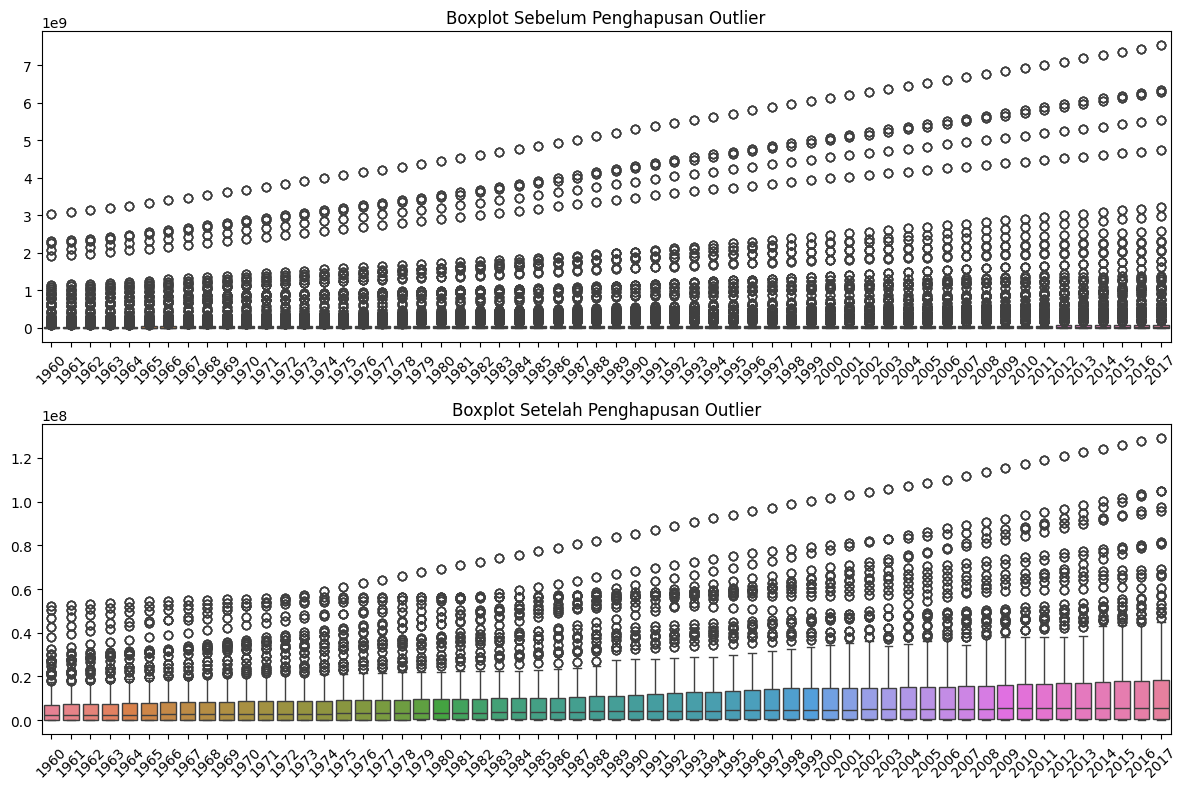

In [37]:
plt.figure(figsize=(12, 8))

# Buat subplot untuk boxplot atas
plt.subplot(2, 1, 1)  # 2 baris, 1 kolom, subplot pertama
sns.boxplot(data=population_data)
plt.title('Boxplot Sebelum Penghapusan Outlier')
plt.xticks(rotation=45)

# Buat subplot untuk boxplot bawah
plt.subplot(2, 1, 2)  # 2 baris, 1 kolom, subplot kedua
sns.boxplot(data=pops_dat)
plt.title('Boxplot Setelah Penghapusan Outlier')
plt.xticks(rotation=45)

# Tampilkan plot
plt.tight_layout()  # Agar subplot tidak tumpang tindih
plt.show()

#### 2.10 Melakukan scaling features dengan metode MinMax Scaler pada dataset gdp_data dan population_data

##### Function minmax_scaler di bawah ini digunakan untuk melakukan scaling features dengan metode MinMax Scaler

In [38]:
def minmax_scaler(df):
   # Inisialisasi MinMaxScaler
   scaler = MinMaxScaler()

   # Filter hanya kolom-kolom numerik yang akan di-scaling
   numerical_columns = df.select_dtypes(include=['float64', 'int64'])
   numerical_columns.columns = numerical_columns.columns.astype(str)

   # Lakukan scaling pada kolom numerik
   scaled_values = scaler.fit_transform(numerical_columns)

   # Buat DataFrame baru dari hasil scaling
   scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns, index=numerical_columns.index)

   # Update DataFrame hasil scaling dengan DataFrame asli
   for column in scaled_df.columns:
      df[column] = scaled_df[column]

   return df


##### 2.10.1 population_data

In [39]:
scaled_population_data = minmax_scaler(population_data)
scaled_population_data.to_csv("data-cleaned/scaled_popdat.csv")
scaled_population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,0.000016,0.000017,0.000017,0.000016,0.000016,0.000016,...,0.000014,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000012
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,0.002966,0.002981,0.002988,0.002986,0.002986,0.002988,...,0.004032,0.004087,0.004153,0.004234,0.004322,0.004415,0.004504,0.004584,0.004654,0.004717
2,Angola,AGO,"Population, total",SP.POP.TOTL,0.001860,0.001870,0.001875,0.001872,0.001869,0.001864,...,0.003214,0.003291,0.003369,0.003451,0.003533,0.003617,0.003701,0.003785,0.003869,0.003954
3,Albania,ALB,"Population, total",SP.POP.TOTL,0.000529,0.000539,0.000546,0.000551,0.000555,0.000559,...,0.000434,0.000426,0.000419,0.000413,0.000407,0.000401,0.000396,0.000390,0.000385,0.000380
4,Andorra,AND,"Population, total",SP.POP.TOTL,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,...,0.000011,0.000011,0.000011,0.000011,0.000010,0.000010,0.000009,0.000009,0.000009,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,0.038850,0.038845,0.038861,0.038892,0.038923,0.038956,...,0.000530,0.000539,0.000548,0.000558,0.000569,0.000579,0.000589,0.000600,0.000610,0.000621
1052,World,WLD,"Population, total",SP.POP.TOTL,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1053,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,0.001704,0.001710,0.001710,0.001705,0.001700,0.001696,...,0.003303,0.003353,0.003404,0.003456,0.003507,0.003558,0.003608,0.003657,0.003704,0.003750
1054,Zambia,ZMB,"Population, total",SP.POP.TOTL,0.001003,0.001020,0.001035,0.001047,0.001059,0.001070,...,0.001932,0.001963,0.001996,0.002032,0.002069,0.002107,0.002147,0.002187,0.002227,0.002269


##### 2.10.2 gdp_data

In [40]:
scaled_gdp_data = minmax_scaler(gdp_csv_df)
scaled_gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.052299,0.052161,0.051690,0.051858,0.051985,0.049989,...,0.000044,0.000041,0.000037,0.000035,0.033213,0.033337,0.033543,0.033479,0.034057,0.035297
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,0.000388,0.000381,0.000356,0.000454,0.000440,0.000510,...,0.000160,0.000207,0.000241,0.000244,0.000273,0.000263,0.000260,0.000256,0.000256,0.000257
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.052299,0.052161,0.051690,0.051858,0.051985,0.049989,...,0.001327,0.001255,0.001251,0.001420,0.001519,0.001621,0.001601,0.001371,0.001255,0.001539
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.052299,0.052161,0.051690,0.051858,0.051985,0.049989,...,0.000203,0.000200,0.000180,0.000175,0.000164,0.000165,0.000167,0.000152,0.000156,0.000161
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.052299,0.052161,0.051690,0.051858,0.051985,0.049989,...,0.000063,0.000060,0.000050,0.000046,0.000042,0.000042,0.000042,0.000037,0.000037,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,0.052299,0.052161,0.051690,0.051858,0.051985,0.049989,...,0.000089,0.000094,0.000088,0.000091,0.000086,0.000091,0.000093,0.000086,0.000088,0.000088
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,0.052299,0.052161,0.051690,0.051858,0.051985,0.049989,...,0.000424,0.000417,0.000468,0.000446,0.000472,0.000524,0.000546,0.000462,0.000239,0.035297
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,0.005587,0.005648,0.005625,0.005775,0.005793,0.005812,...,0.004526,0.004942,0.005690,0.005687,0.005286,0.004760,0.004434,0.004245,0.003894,0.004330
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,0.000518,0.000486,0.000453,0.000434,0.000462,0.000549,...,0.000282,0.000254,0.000307,0.000320,0.000340,0.000364,0.000343,0.000282,0.000275,0.000319


#### 2.10 Feature Engineering dengan menambahkan kolom gdppercapita yang valuenya berasal dari gdp/population

NameError: name 'new_prodat_csv' is not defined

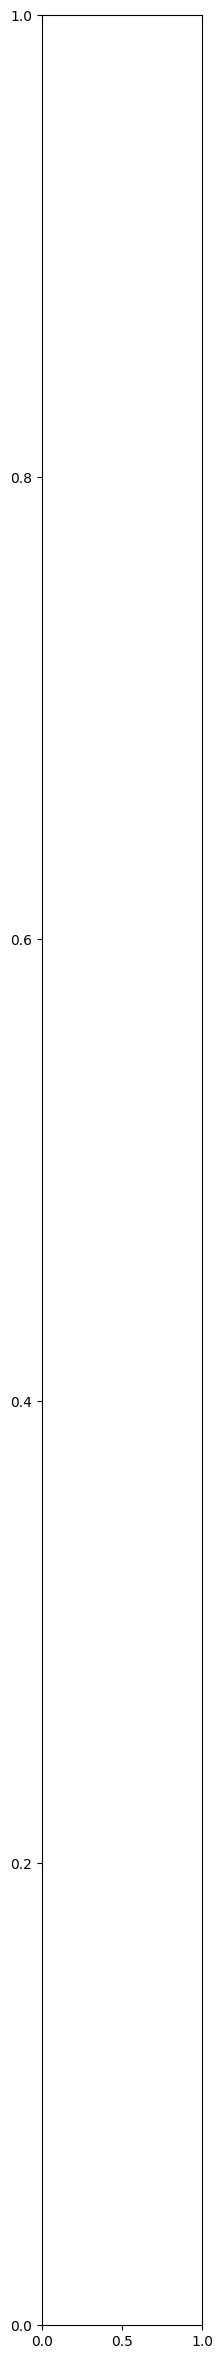

In [41]:
# Menampilkan 5 boxplot sekaligus
plt.figure(figsize=(12, 30))

# Boxplot DataFrame 1
plt.subplot(1, 5, 1)
sns.boxplot(data=new_prodat_csv)
plt.title('DataFrame 1')

# Boxplot DataFrame 2
plt.subplot(2, 5, 1)
sns.boxplot(data=new_pop_csv)
plt.title('DataFrame 2')

# Boxplot DataFrame 3
plt.subplot(3, 5, 1)
sns.boxplot(data=new_pop_json)
plt.title('DataFrame 3')

# Boxplot DataFrame 4
plt.subplot(4, 5, 1)
sns.boxplot(data=new_pop_xml)
plt.title('DataFrame 4')

# Boxplot DataFrame 5
plt.subplot(5, 5, 1)
sns.boxplot(data=new_pop_db)
plt.title('DataFrame 5')

plt.tight_layout()
plt.show()

In [ ]:
# melakukan transoformasi terhadap dataframe agar mudah untuk disatukan
# cleaned_popcsv_df = cleaned_popcsv_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
#                                                      var_name='Year', value_name='csv_value').sort_values(by='Country Name').reset_index(drop=True)
# cleaned_popjson_df = cleaned_popjson_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
#                                                      var_name='Year', value_name='csv_value').sort_values(by='Country Name').reset_index(drop=True)
# cleaned_popxml_df = cleaned_popxml_df.rename(columns={"Country or Area": "Country Name",
#                                                       "Item": "Indicator Name",
#                                                       "Value": "xml_value"})

In [ ]:
# # cleaned_popxml_df.to_csv("xml.csv")
# cleaned_popxml_df
# # Mengubah format dataframe
# df_pivoted = cleaned_popxml_df.pivot(index=['Country or Area', 'Item'], columns='Year', values='Value').reset_index()

# # Menghapus nama kolom indeks
# df_pivoted.columns.name = None

# # Menampilkan dataframe hasil transformasi
# df_pivoted

In [ ]:
# population_data.csv
cleaned_popcsv_df = cleaning(population_data_csv_df)
numeric_df = cleaned_popcsv_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popcsv_df = cleaned_popcsv_df.fillna(mean_values)

# population_data.json
cleaned_popjson_df = cleaning(population_data_json_df)
numeric_df = cleaned_popjson_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popjson_df = cleaned_popjson_df.fillna(mean_values)

# population_data.xml
population_data_xml_df = population_data_xml_df.pivot(index=['Country or Area', 'Item'], columns='Year', values='Value').reset_index()   # mengubah format dataframe
population_data_xml_df.columns.name = None   # menghapus nama kolom indeks
population_data_xml_df = population_data_xml_df.rename(columns={"Country or Area": "Country Name", "Item": "Indicator Name"})
cleaned_popxml_df = cleaning(population_data_xml_df)
numeric_df = cleaned_popxml_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popxml_df = cleaned_popxml_df.fillna(mean_values)

# population_data.db
population_data_db_df1 = population_data_db_df1.rename(columns={"Country_Name": "Country Name",
                                                                "Country_Code": "Country Code",
                                                                "Indicator_Name": "Indicator Name",
                                                                "Indicator_Code": "Indicator Code"
                                                               })
cleaned_popdb_df = cleaning(population_data_db_df1)
cleaned_popdb_df.drop("index", axis=1, inplace=True)
numeric_df = cleaned_popdb_df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
cleaned_popdb_df = cleaned_popdb_df.fillna(mean_values)

# API World Bank
api_world_bank_df = api_world_bank_df.pivot(index=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], columns='Year', values='api_value').reset_index()
api_world_bank_df.columns.name = None   # menghapus nama kolom indeks
cleaned_apiwb_df = cleaning(api_world_bank_df)

# menampilkan population_data.csv
cleaned_popcsv_df

In [ ]:
data_equal = cleaned_popcsv_df.equals(cleaned_popjson_df)
print("Kedua DataFrame memiliki nilai yang sama:", data_equal)

df_diff = cleaned_popcsv_df.compare(cleaned_popjson_df)
print("Perbedaan antara kedua DataFrame:")
print(df_diff)

Kedua DataFrame memiliki nilai yang sama: True
Perbedaan antara kedua DataFrame:
Empty DataFrame
Columns: []
Index: []
